<a href="https://colab.research.google.com/github/cartf15/TFM-CnnLstm/blob/master/Data_Load_Preparetion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

sample_data/


**Importamos las librerías para la preparaicon de datos**

In [21]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

**Cargamos el dataset de energía tomado de UCI machine learning**

In [7]:
# load all data
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())

FileNotFoundError: ignored

# New Section

**Realizamos el tratamiento de datos nullos '?' y los reemplazamos por valores numpy.'nan'** 

In [ ]:
# mark all missing values
dataset.replace('?', np.nan , inplace=True)

In [ ]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

**Creamos una columna calculada para generar una submedicion**

In [ ]:
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] +
values[:,6])


**Creamos nuevamente un archivo del dataset con los valores calculados y corregidos**

In [ ]:
dataset.to_csv('household_power_consumption.csv')

In [ ]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=None)
print(dataset.head())

                     0                    1  ...               7               8
0             datetime  Global_active_power  ...  Sub_metering_3  sub_metering_4
1  2006-12-16 17:24:00                4.216  ...            17.0        52.26667
2  2006-12-16 17:25:00                5.360  ...            16.0       72.333336
3  2006-12-16 17:26:00                5.374  ...            17.0       70.566666
4  2006-12-16 17:27:00                5.388  ...            17.0            71.8

[5 rows x 9 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Creamos una grafica para visualizar cada una de las variables**

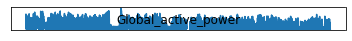

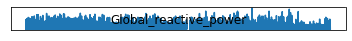

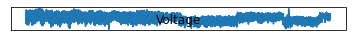

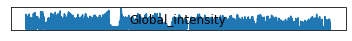

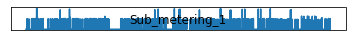

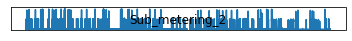

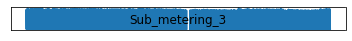

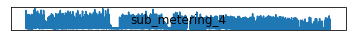

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
                    parse_dates=['datetime'], index_col=['datetime']) 
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
# create subplot
  pyplot.subplot(len(dataset.columns), 1, i+1)
  # get variable name
  name = dataset.columns[i]
  # plot data
  pyplot.plot(dataset[name])
  # set title
  pyplot.title(name, y=0)
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
  pyplot.show()

**Hacemos zoom en la variable Global active power que es de interés para identificar patrones a lo largo de los años**

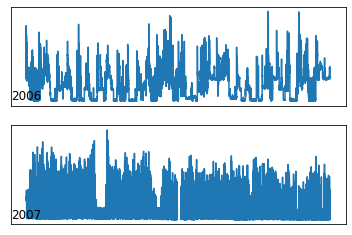

In [ ]:
# yearly line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years =['2006', '2007']
pyplot.figure()
for i in range(len(years)):
  # prepare subplot
  ax = pyplot.subplot(len(years), 1, i+1)
  # determine the year to plot
  year = years[i]
  # get all observations for the year
  result = dataset[str(year)]
  # plot the active power for the year
  pyplot.plot(result['Global_active_power'])

  # add a title to the subplot
  pyplot.title(str(year), y=0, loc='left')
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
pyplot.show()

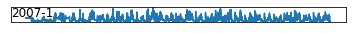

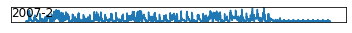

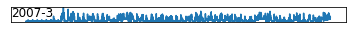

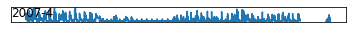

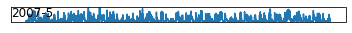

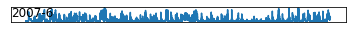

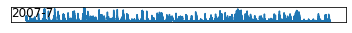

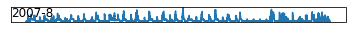

'2007-9'
'2007-10'
'2007-11'
'2007-12'


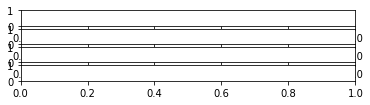

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
  try:
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset[month]
    # plot the active power for the month
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(month, y=0, loc='left')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()
  except Exception as e:
    print(e)

In [ ]:
# daily line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure()
for i in range(len(days)):
  try:
  # prepare subplot
    ax = pyplot.subplot(len(days), 1, i+1)
    # determine the day to plot
    day = '2007-01-' + str(days[i])
    # get all observations for the day
    result = dataset[day]
    # plot the active power for the day
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(day, y=0, loc='left', size=6)
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()
  except Exception as e :
    print(e)

**Identificacion de la distribución de los datos**

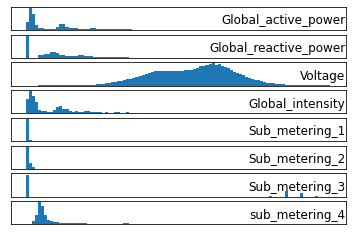

In [ ]:
# histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# histogram plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
  try:
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # create histogram
    dataset[name].hist(bins=100)
    # set title
    pyplot.title(name, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
  except Exception as e:
    print(e)

**Revisando mas a fondo la variable Active power ya que parece ser una variable bimodal**

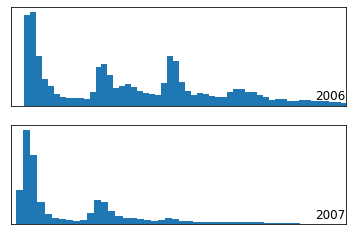

In [ ]:
# yearly histogram plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
years = ['2006', '2007']
pyplot.figure()
for i in range(len(years)):
  # prepare subplot
  ax = pyplot.subplot(len(years), 1, i+1)
  # determine the year to plot
  year = years[i]
  # get all observations for the year
  result = dataset[str(year)]
  # plot the active power for the year
  result['Global_active_power'].hist(bins=100)
  # zoom in on the distribution
  ax.set_xlim(0, 5)
  # add a title to the subplot
  pyplot.title(str(year), y=0, loc='right')
  # turn off ticks to remove clutter
  pyplot.yticks([])
  pyplot.xticks([])
pyplot.show()

'2006-1'
'2006-2'
'2006-3'
'2006-4'
'2006-5'
'2006-6'
'2006-7'
'2006-8'
'2006-9'
'2006-10'
'2006-11'


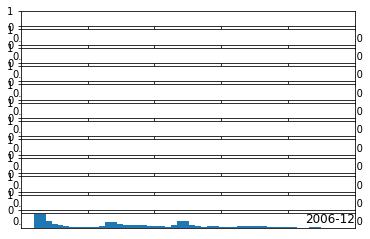

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure()
for i in range(len(months)):
  try:
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2006-' + str(months[i])
    # get all observations for the month
    result = dataset[month]
    # plot the active power for the month
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    pyplot.title(month, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
    pyplot.show()
  except Exception as e :
    print(e)

**Desarrollo de modelo de control o Linea base que será el punto de comparación con el modelo propuesto**

In [5]:
pwd

'/content'

In [5]:
# fill missing values with a valua at the same time one day ago
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', np.nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
def fill_missing(values):
  one_day = 60 * 24
  for row in range(values.shape[0]):
    for col in range(values.shape[1]):
      if np.isnan(values[row, col]):
        values[row, col] = values[row - one_day, col]   

In [6]:
fill_missing(dataset.values)

In [7]:
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] +
values[:,6])

In [8]:
dataset.to_csv('household_power_consumption.csv')

**Dado un consumo energético cual es el consumo de energía de la semana proxima**

In [9]:
from pandas import read_csv
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...    14680.933319
2006-12-17             3390.460  ...    36946.666732
2006-12-18             2203.826  ...    19028.433281
2006-12-19             1666.194  ...    13131.900043
2006-12-20             2225.748  ...    20384.800011

[5 rows x 8 columns]


In [10]:
def evaluate_forecasts(actual, predicted):
  scores = list()
  # calculate an RMSE score for each day
  for i in range(actual.shape[1]):
    # calculate mse
    mse = mean_squared_error(actual[:, i], predicted[:, i])
    # calculate rmse
    rmse = sqrt(mse)
    # store
    scores.append(rmse)
  # calculate overall RMSE
  s = 0
  for row in range(actual.shape[0]):
    for col in range(actual.shape[1]):
      s += (actual[row, col] - predicted[row, col])**2
  score = sqrt(s / (actual.shape[0] * actual.shape[1]))
  return score, scores

In [11]:
def split_dataset(data):
  # split into standard weeks
  train, test = data[1:-328], data[-328:-6]
  # restructure into windows of weekly data
  train = array(split(train, len(train)/7))
  test = array(split(test, len(test)/7))
  return train, test

In [12]:
# split the power usage dataset into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv
# split a univariate dataset into train/test sets
def split_dataset(data):
  # split into standard weeks
  train, test = data[1:-328], data[-328:-6]
  # restructure into windows of weekly data
  train = array(split(train, len(train)/7))
  test = array(split(test, len(test)/7))
  return train, test
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0,
infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1309.2679999999998
(46, 7, 8)
2083.4539999999984 2197.006000000004


In [13]:
def evaluate_model(model_func, train, test):
  # history is a list of weekly data
  history = [x for x in train]
  # walk-forward validation over each week
  predictions = list()
  for i in range(len(test)):
    # predict the week
    yhat_sequence = model_func(history)
    # store the predictions
    predictions.append(yhat_sequence)
    # get real observation and add to history for predicting the next week
    history.append(test[i, :])
  predictions = array(predictions)
  # evaluate predictions days for each week
  score, scores = evaluate_forecasts(test[:, :, 0], predictions)
  return score, scores

In [14]:
def summarize_scores(name, score, scores):
  s_scores = ', '.join(['%.1f' % s for s in scores])
  print('%s: [%.3f] %s' % (name, score, s_scores))

In [15]:
# daily persistence model
def daily_persistence(history):
  # get the data for the prior week
  last_week = history[-1]
  # get the total active power for the last day
  value = last_week[-1, 0]
  # prepare 7 day forecast
  forecast = [value for _ in range(7)]
  return forecast

In [16]:
# weekly persistence model
def weekly_persistence(history):
  # get the data for the prior week
  last_week = history[-1]
  return last_week[:, 0]

In [17]:
# week one year ago persistence model
def week_one_year_ago_persistence(history):
  # get the data for the prior week
  last_week = history[-52]
  return last_week[:, 0]

In [18]:
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0,
infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)

In [19]:
# define the names and functions for the models we wish to evaluate
models = dict()
models['daily'] = daily_persistence
models['weekly'] = weekly_persistence
models['week-oya'] = week_one_year_ago_persistence

daily persistence: [511.886] 452.9, 596.4, 532.1, 490.5, 534.3, 481.5, 482.0
daily persistence: [469.389] 567.6, 500.3, 411.2, 466.1, 471.9, 358.3, 482.0
daily persistence: [465.294] 550.0, 446.7, 398.6, 487.0, 459.3, 313.5, 555.1


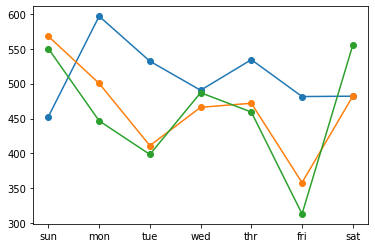

In [22]:
# evaluate each model
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
for name, func in models.items():
  # evaluate and get scores
  score, scores = evaluate_model(func, train, test)
  # summarize scores
  summarize_scores('daily persistence', score, scores)
  # plot scores
  pyplot.plot(days, scores, marker='o', label=name)